In [6]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

#import os
#import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [7]:
puidata = os.getenv("PUIDATA")

In [8]:
! curl -O https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip
! mv 201502-citibike-tripdata.zip $PUIDATA
! unzip $PUIDATA/201502-citibike-tripdata.zip 
! mv 201502-citibike-tripdata.csv $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  18.9M      0 --:--:-- --:--:-- --:--:-- 18.9M
Archive:  /nfshome/yd1402/PUIdata/201502-citibike-tripdata.zip
  inflating: 201502-citibike-tripdata.csv  


In [9]:
df = pd.read_csv(os.getenv("PUIDATA") + '/201502-citibike-tripdata.csv')
df.head()
df['date'] = pd.to_datetime(df['starttime'])
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')


## NULL HYPOTHESIS:The proportion of men biking on weekday is _the same_ or _higher_  than the proportion of women biking on weekday

# _$H_0$_ : $\frac{W_{\mathrm{weekday}}}{W_{\mathrm{total}}} <= \frac{M_{\mathrm{weeday}}}{M_{\mathrm{total}}}$
# _$H_1$_ : $\frac{W_{\mathrm{weekday}}}{W_{\mathrm{total}}} > \frac{M_{\mathrm{weekday}}}{M_{\mathrm{total}}}$

## I will use a significance level  $\alpha=0.05$

In [10]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [11]:
df.head()

,gender,date
0,2,2015-02-01 00:00:00
1,1,2015-02-01 00:00:00
2,2,2015-02-01 00:01:00
3,2,2015-02-01 00:01:00
4,1,2015-02-01 00:01:00


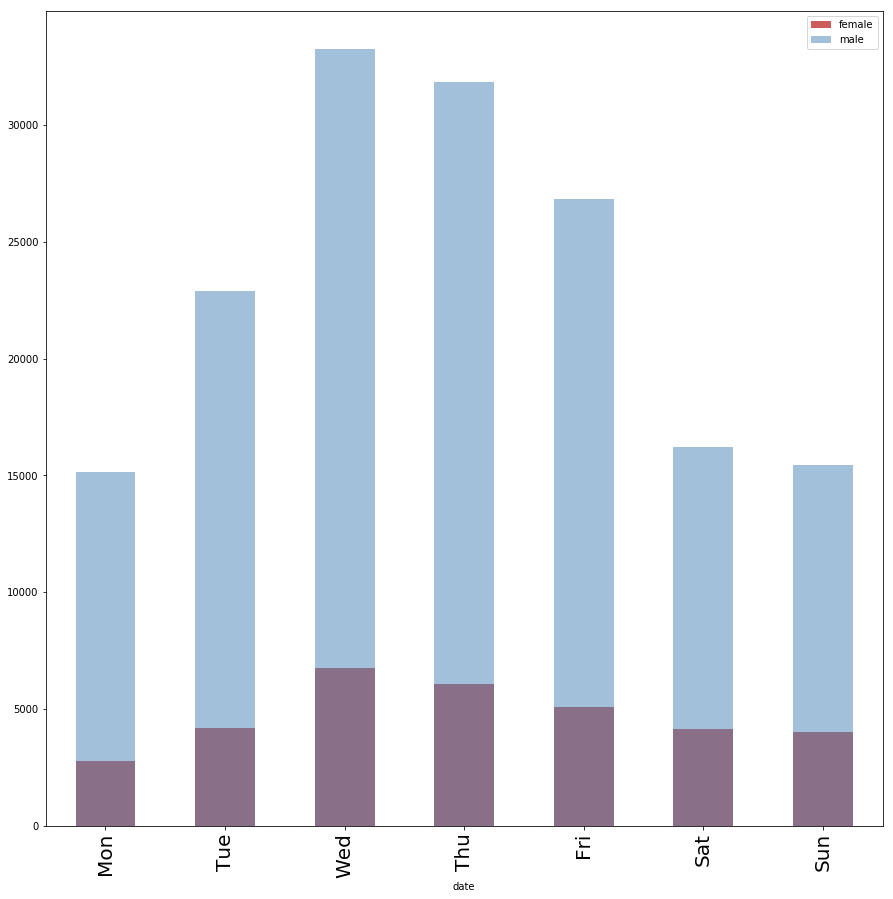

In [9]:
#gender ==2 female. gender ==1 male
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['date'][df['gender'] == 2].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['date'][df['gender'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

## Figure1:Distribution of Citibike bikers by gender by February 2015
we can see that more men use bike than women do

## I use the z-test ,my last citibike assignment doesn't satisfy professor's requirement so I need to reconsider my hypothesis and get no recommendation for the test type, therefore I use z-test because the sample size is greater than 30

In [20]:
Mu, TIME, LEN, SIGMA = 1.5, float(df.mean()), len(df), float(df.std())
calc_z = lambda time, mu, sigma, n : (time - mu) / (sigma / (np.sqrt(n)))
z_score = calc_z(TIME, Mu, SIGMA, LEN)
print("Calculated z-score: %f Abs z-score: %f" % (z_score, abs(z_score)))

Calculated z-score: -387.277259 Abs z-score: 387.277259


z-score in this case is much greater than critical value(1.64), at significance level 0.05. We should reject the null hypothesis,so the proportion of men biking on weekday is less than the proportion of women biking on weekday